# Analyse Nanostring data in Napari-SpatialData 


This tutorial shows how to load and analyse Nanostring data with the Napari-SpatialData plugin.


## Import packages and data

There are two options to install napari-spatialdata:

(1) Run `pip install napari-spatialdata`

or, 

(2) Clone this [repo](https://github.com/scverse/napari-spatialdata) and run `pip install -e .`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from napari_spatialdata import Interactive
from spatialdata import SpatialData
import squidpy as sq
import scanpy as sc

plt.rcParams['figure.figsize'] = (20, 20)

Next, we will download the Nanostring dataset (cosmx_io) for analysis. Uncomment the lines below to download the dataset. 

In [2]:
# !mkdir tutorial_data
# !mkdir tutorial_data/nanostring_data
# !wget -P tutorial_data/nanostring_data https://s3.embl.de/spatialdata/spatialdata-sandbox/cosmx_io.zip
# !tar -xzf tutorial_data/nanostring_data/cosmx_io.zip -C tutorial_data/nanostring_data/.

--2023-05-03 21:11:58--  https://s3.embl.de/spatialdata/spatialdata-sandbox/cosmx_io.zip
Resolving s3.embl.de (s3.embl.de)... 194.94.45.80
Connecting to s3.embl.de (s3.embl.de)|194.94.45.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2210531049 (2,1G) [application/zip]
Saving to: ‘tutorial_data/nanostring_data/cosmx_io.zip’

cosmx_io.zip        100%[===================>]   2,06G  10,9MB/s    in 3m 21s  

2023-05-03 21:15:19 (10,5 MB/s) - ‘tutorial_data/nanostring_data/cosmx_io.zip’ saved [2210531049/2210531049]



We will load the dataset from the filepath and create a {class}`spatialdata.SpatialData` object. We'll use this object with the class `Interactive` to visualise this dataset in Napari.

In [27]:
sdata = SpatialData.read("tutorial_data/nanostring_data/data.zarr")

## Visualise in napari

To make it easier to analyse our data, we will filter the SpatialData object by the coordinate system "1".

In [ ]:
sdata = sdata.filter_by_coordinate_system("1")
adata = sdata.table

Then, we make the variable names unique using the method `anndata.var_names_make_unique`. We obtain the mitochondrial genes using their names prefixed with “mt-”. We calculate the quality control metrics on the anndata.AnnData using `scanpy.pp.calculate_qc_metrics`.

In [29]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

The `scikit-misc package` could be required for highly variable genes identification.

In [ ]:
# !pip install scikit-misc

Annotate the highly variable genes based on the count data by using `scanpy.pp.highly_variable_genes` with flavor="seurat_v3". Normalize counts per cell using `scanpy.pp.normalize_total`.

Logarithmize, do principal component analysis, compute a neighborhood graph of the observations using `scanpy.pp.log1p`, `scanpy.pp.pca` and `scanpy.pp.neighbors` respectively.

Use `scanpy.tl.umap` to embed the neighborhood graph of the data and cluster the cells into subgroups employing `scanpy.tl.leiden`.

In [ ]:
adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

Next, we will use the Scatter Widget offered by Napari SpatialData to visualise the UMAP coordinates.

First, we instantiate the `Interactive` class with our {class}`spatialdata.SpatialData` object, and view it in Napari.

In [31]:
interactive = Interactive(sdata)
interactive.run()

D:\kasia\240711_spatialdata\napari-spatialdata\src\napari_spatialdata\_view.py:421: FutureWarning: Private attribute access ('Window._dock_widgets') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.6.0
  self._model = model if model else napari_viewer.window._dock_widgets["SpatialData"].widget().viewer_model._model


(-0.5, 1678.5, 1199.5, -0.5)

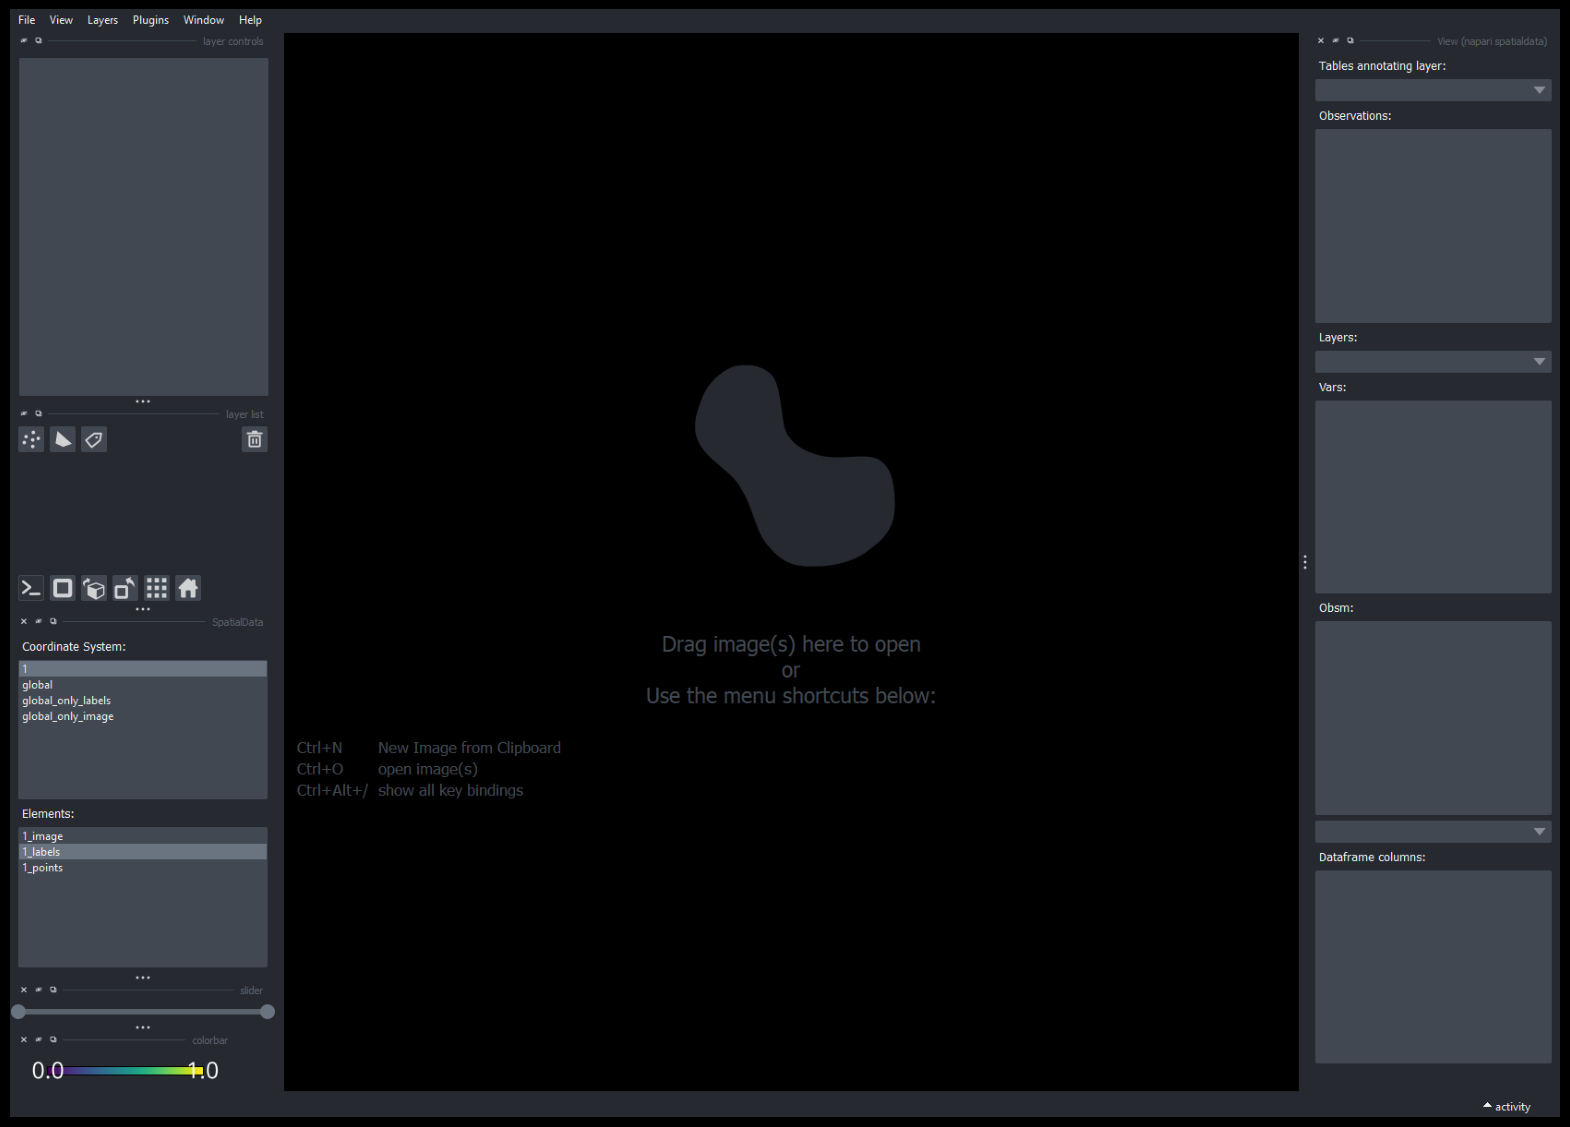

In [37]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We select the coordinate system "1" and load the elements "1_image" and "1_labels" into the viewer.

(-0.5, 1678.5, 1199.5, -0.5)

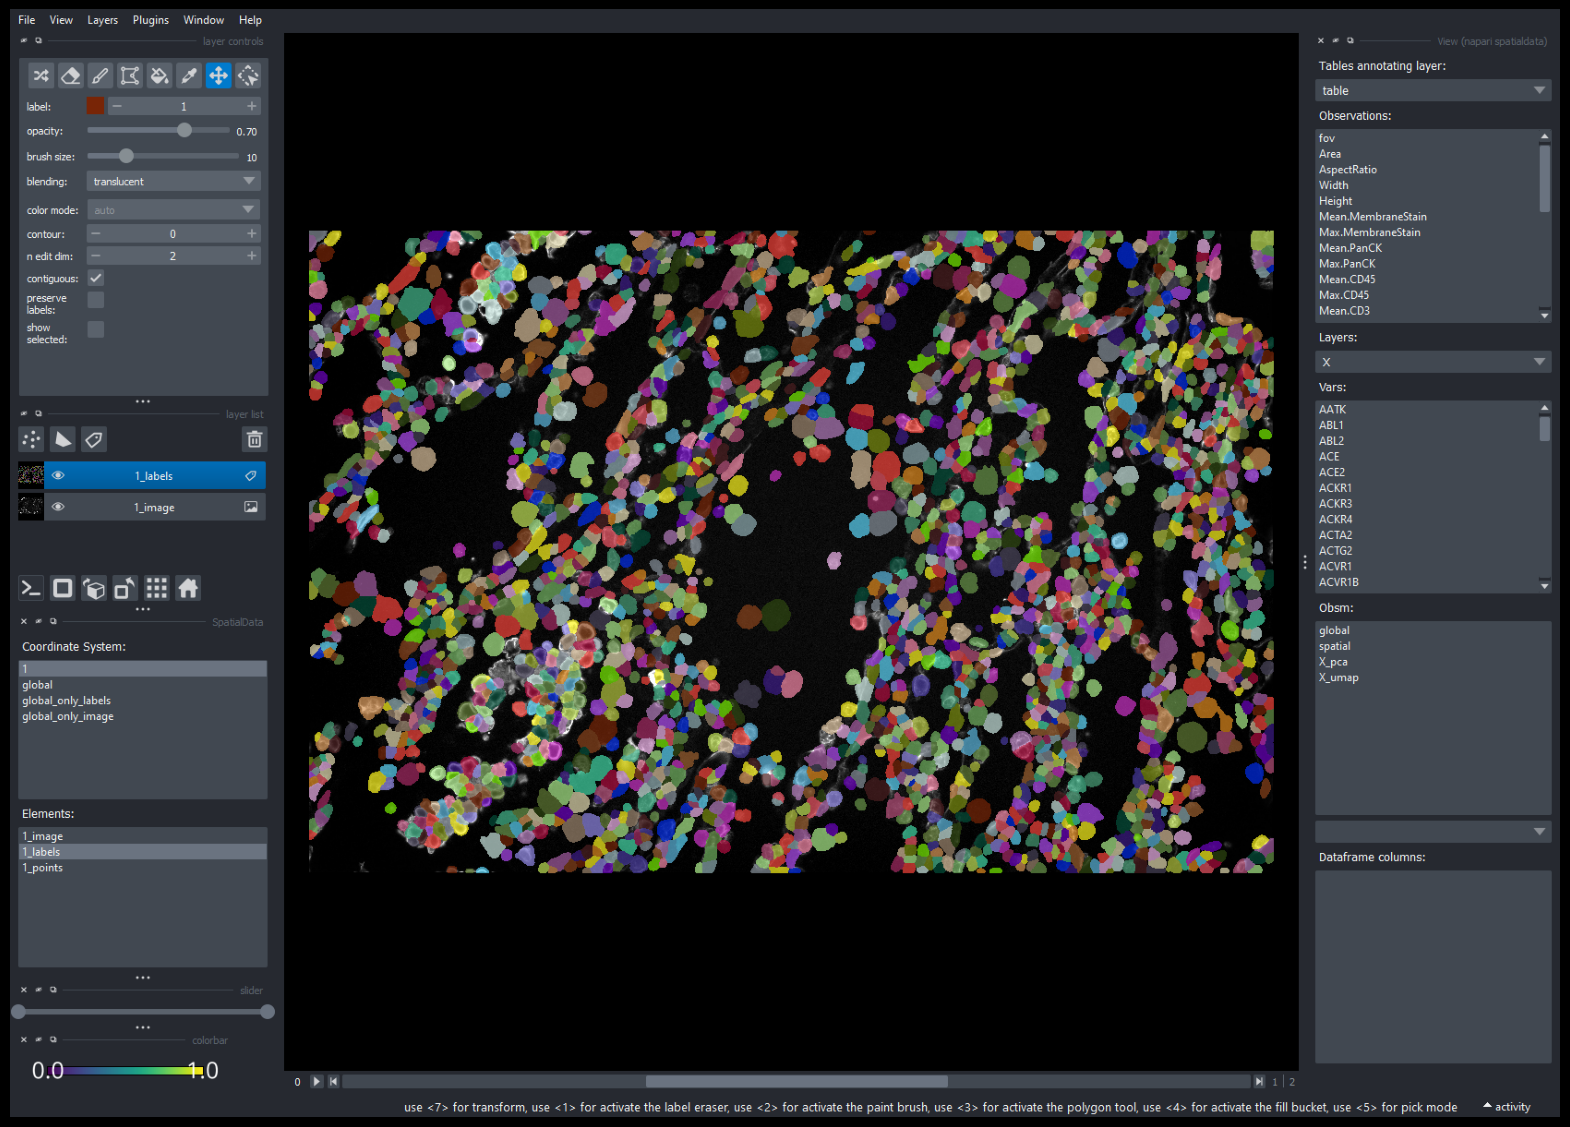

In [39]:
plt.imshow(interactive.screenshot())
plt.axis('off')

Select "1_labels" in the list of layers. Then, we open the "Scatter" Widget by using the menu bar and going to Plugins > napari-spatialdata > Scatter. This loads the AnnData object associated with that layer into the "Scatter" Widget.

(-0.5, 1678.5, 1199.5, -0.5)

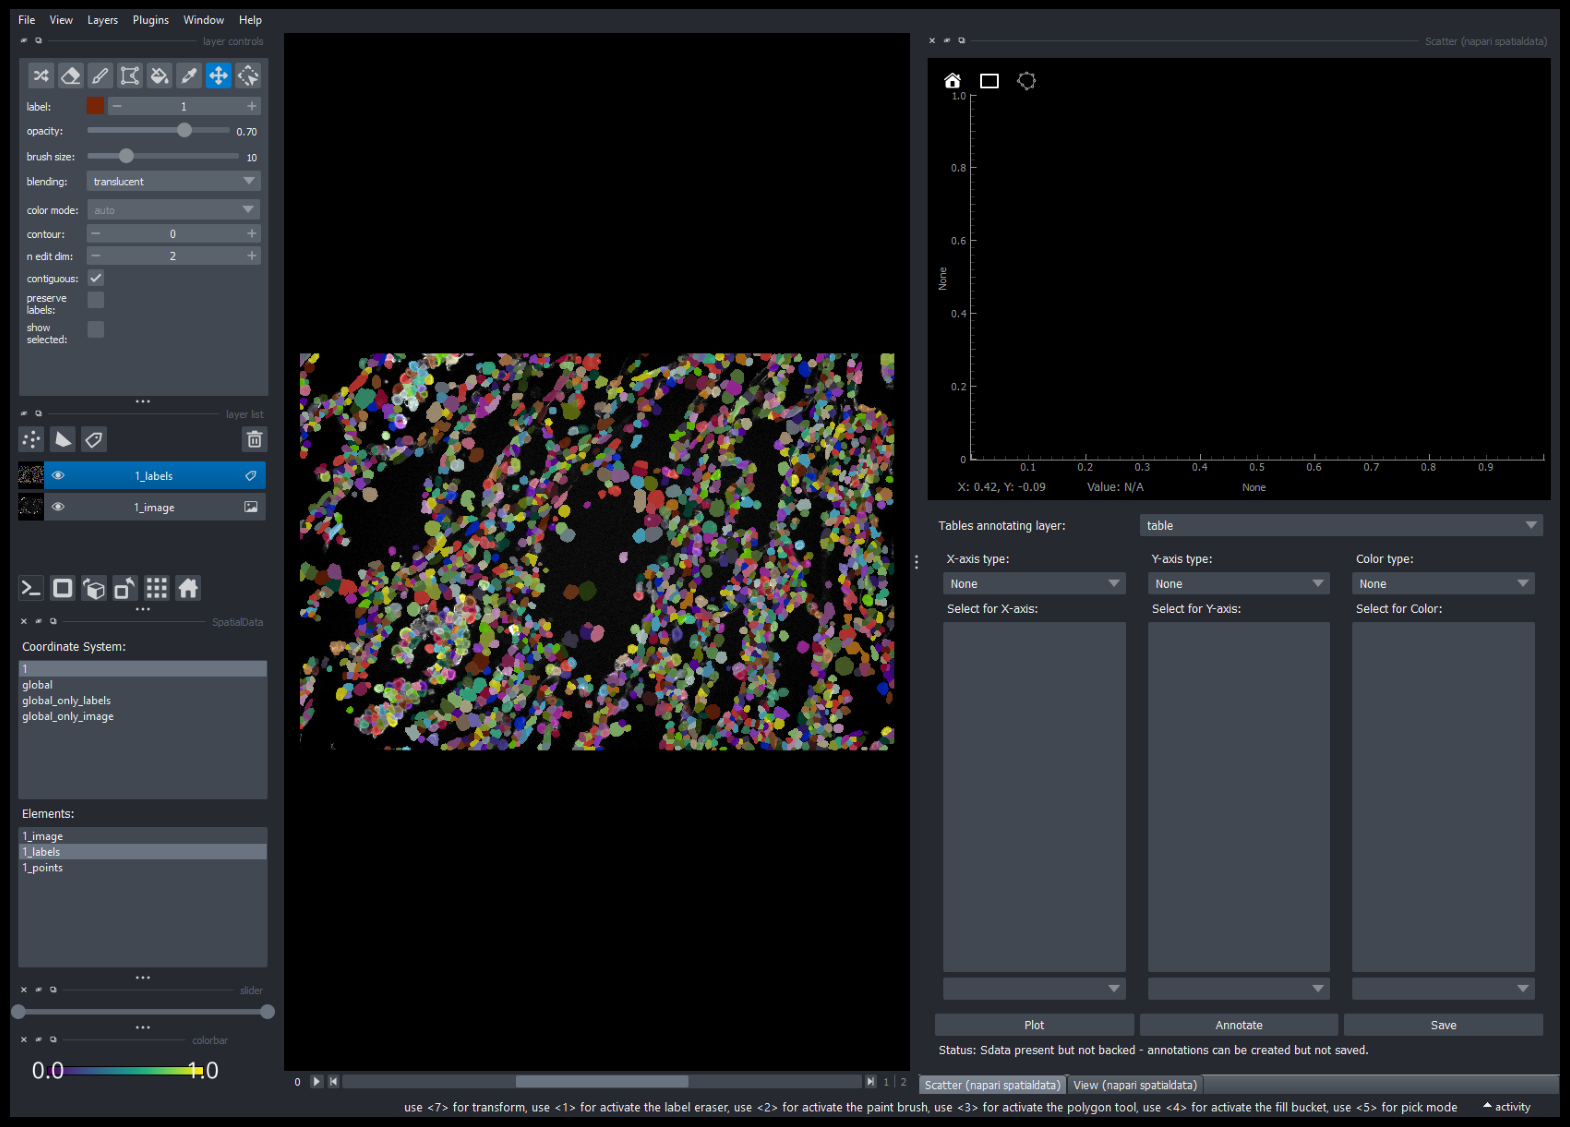

In [42]:
plt.imshow(interactive.screenshot())
plt.axis('off')

Now, we can pick specific x-axis, y-axis and color values to visualise in the scatterplot. In the example below, we're visualising the UMAP (Uniform Manifold Approximation and Projection) coordinates (from obsm) of two different axes and coloring it with clusters created using the Leiden algorithm (from obs). Use the "Plot" button to show the plot after you make the selections.

(-0.5, 1678.5, 1199.5, -0.5)

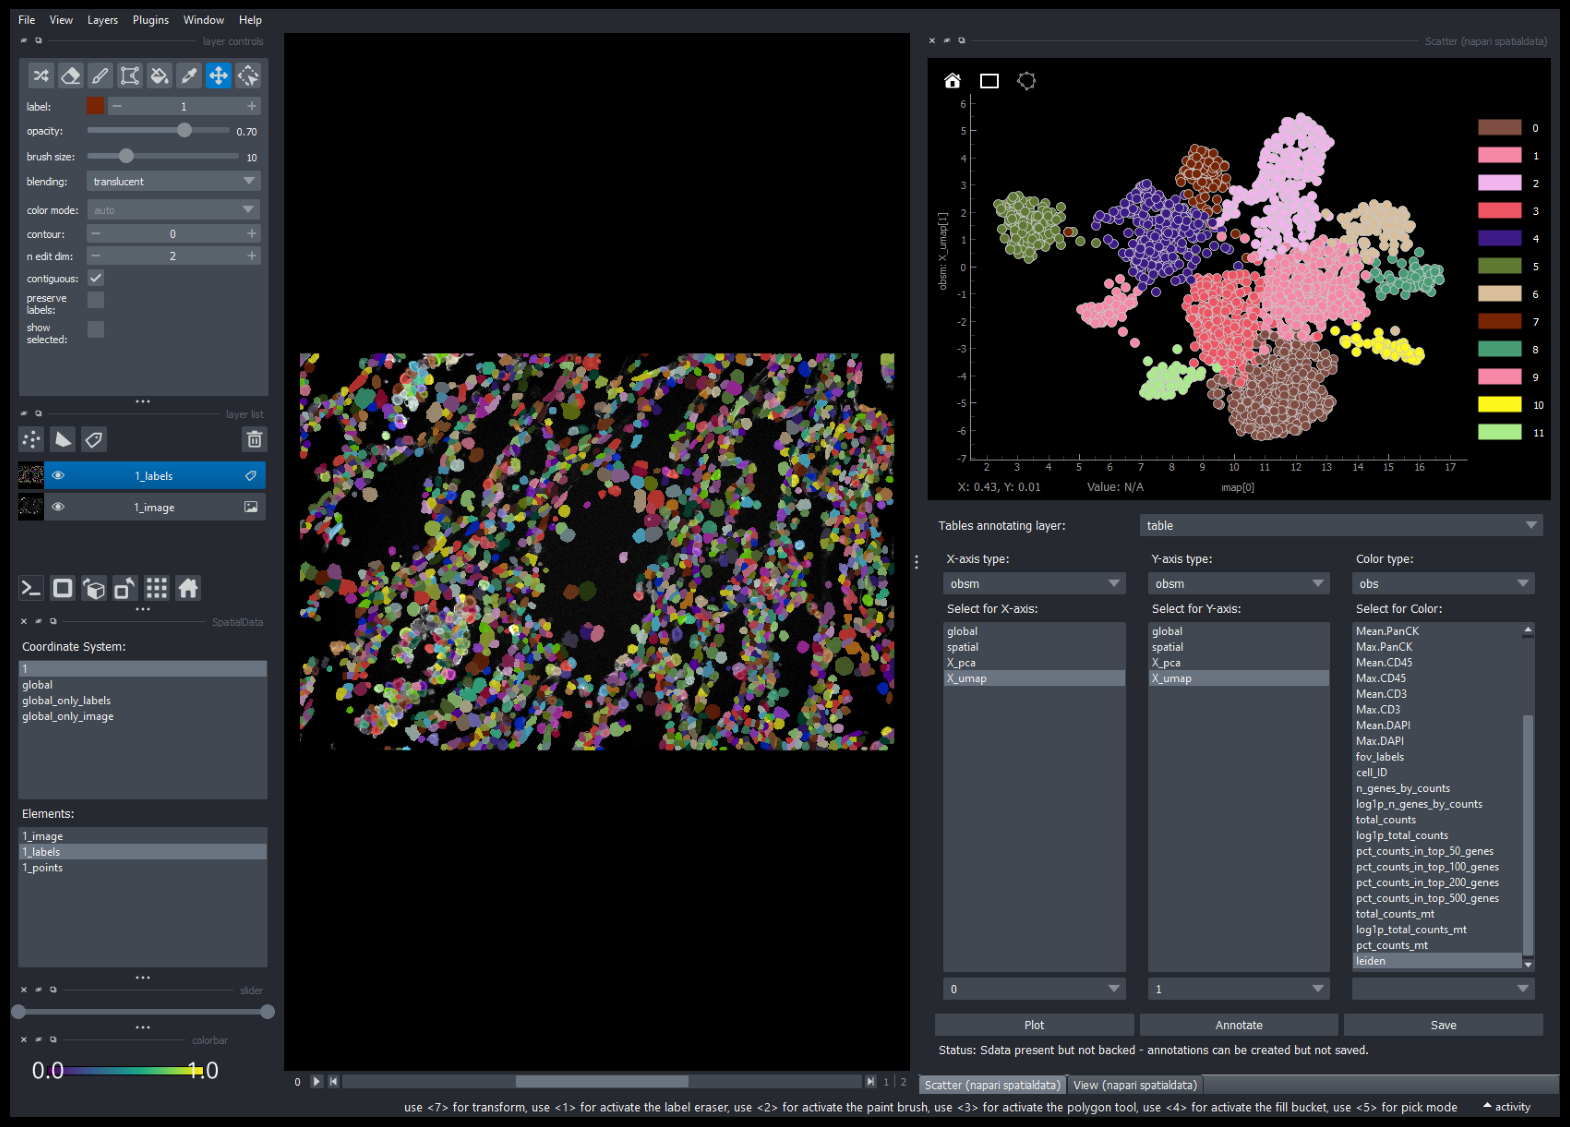

In [45]:
plt.imshow(interactive.screenshot())
plt.axis('off')

After plotting, it is possible to interactively select clusters and export it to AnnData.

In the example below, we used the lasso tool to select the left most cluster (value of 11). We can export it into AnnData by clicking on the "Annotate" button. A new dialog will open to specify the name of your new annotation, here we will call it 'my_annotation'.

(-0.5, 1678.5, 1199.5, -0.5)

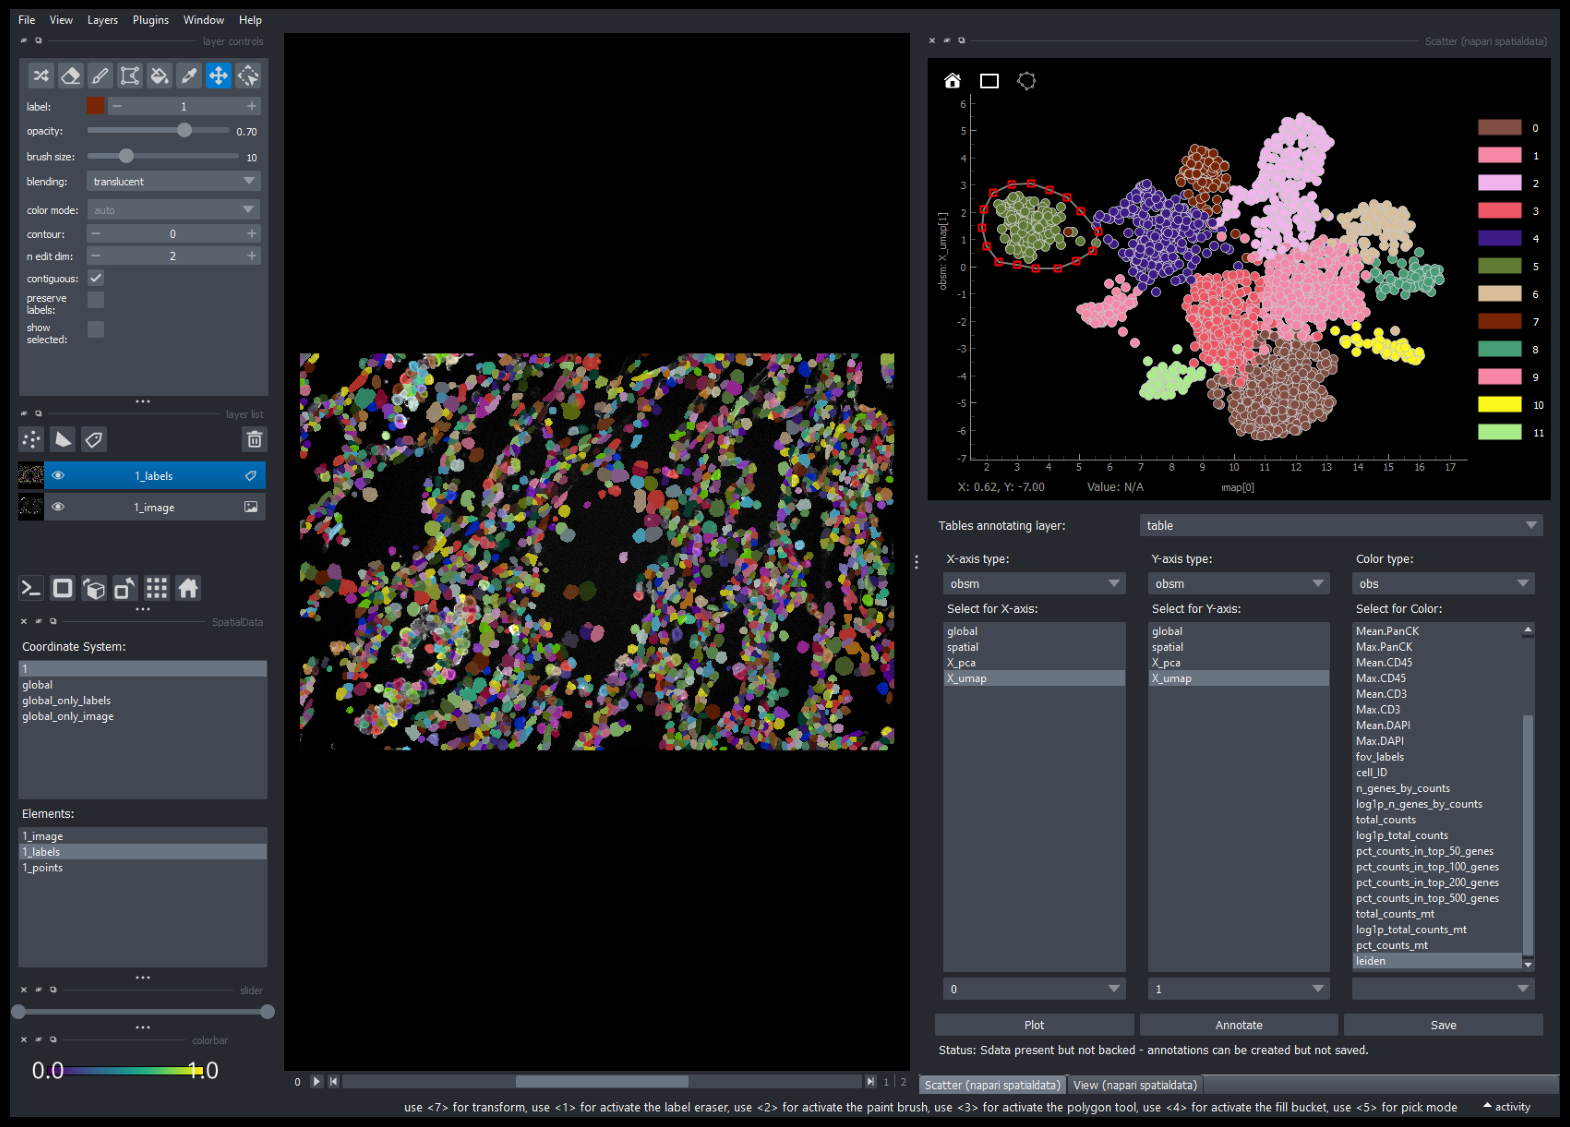

In [47]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can now use our new annotation 'my_annotation' in the Scatter Widget directly. In this example we will use it as color.

(-0.5, 1678.5, 1199.5, -0.5)

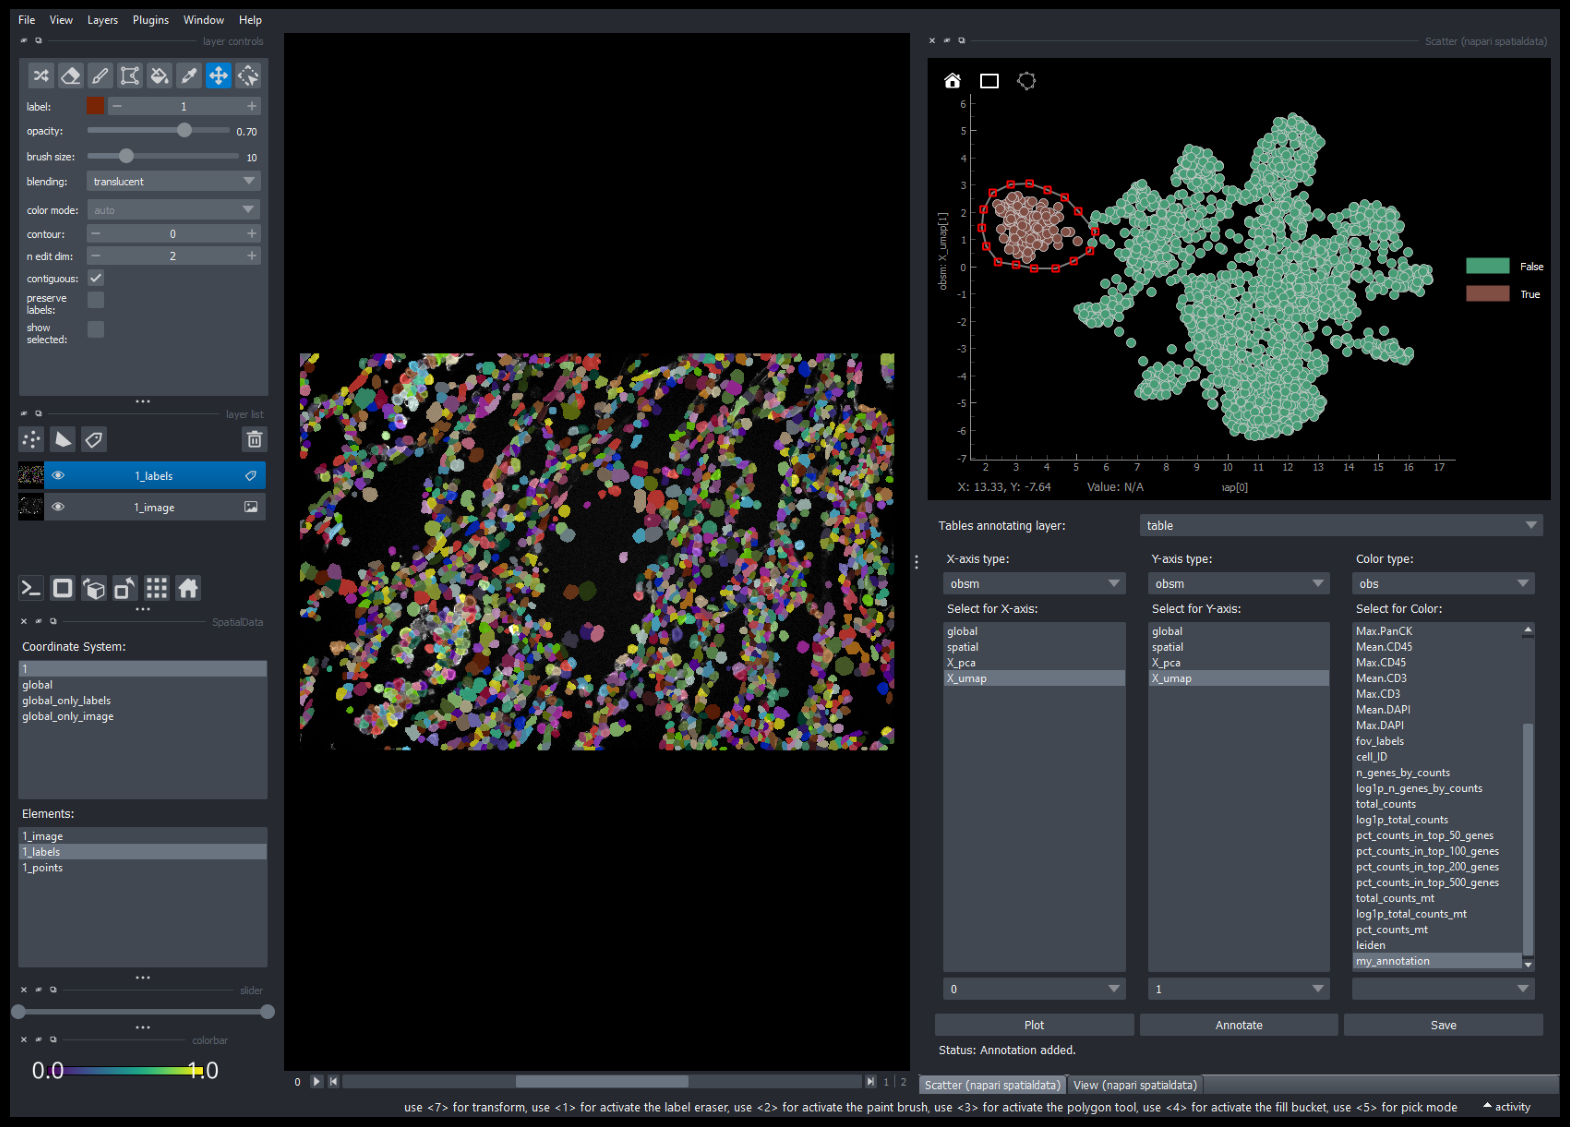

In [49]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can also view the selected points with the View widget. Close the Scatter Widget and from the menu bar, go to Plugins > napari-spatialdata > View. You should be able to observe "my_annotation" under "Observations:". This is selected points we exported in the previous step.

(-0.5, 1678.5, 1199.5, -0.5)

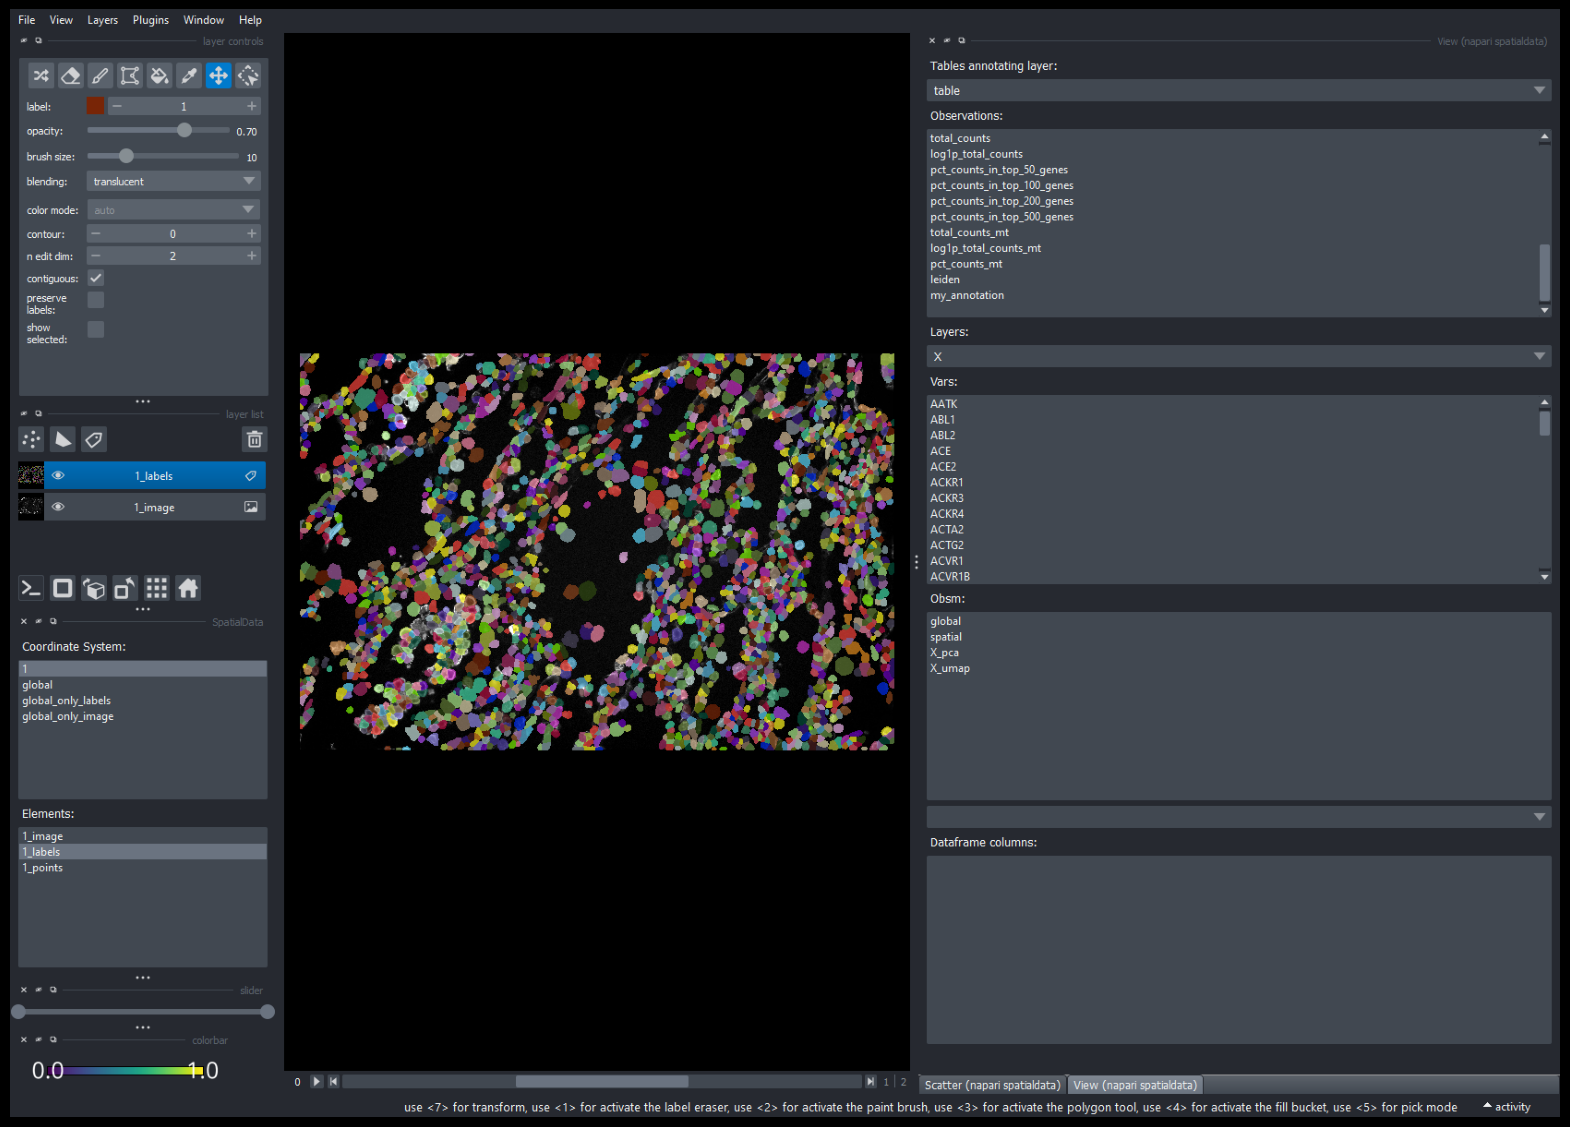

In [51]:
plt.imshow(interactive.screenshot())
plt.axis('off')

Double clicking on "my_annotation" loads it as a layer in the Napari viewer.

(-0.5, 1678.5, 1199.5, -0.5)

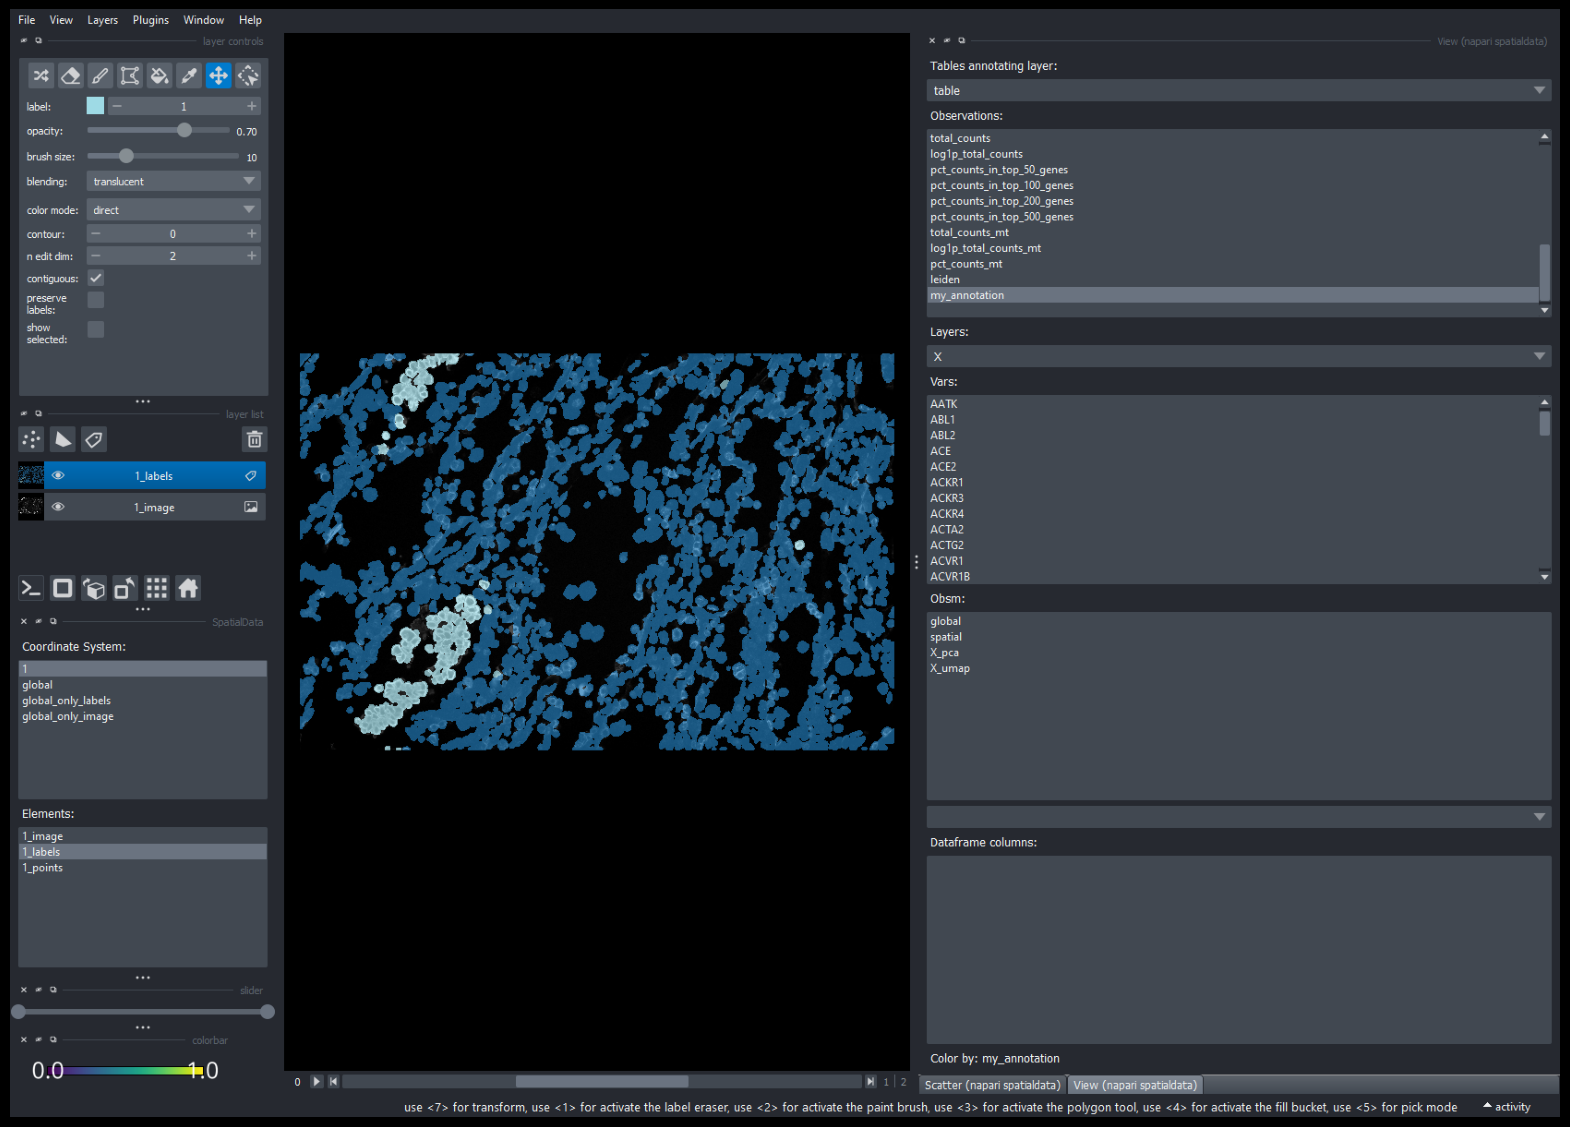

In [53]:
plt.imshow(interactive.screenshot())
plt.axis('off')